# Cardiovascular Disease Prediction

This project aims to predict the presence of cardiovascular disease using patient health data. The objective is to build classification models that can assist in early diagnosis and prevention by analyzing features such as age, cholesterol, blood pressure, and glucose levels.

### Problem Statement

Cardiovascular diseases (CVDs) are the leading cause of death globally, often due to late diagnosis or lack of preventive care. Early detection of cardiovascular risks can greatly improve patient outcomes and reduce healthcare burdens.

In this project, we aim to build machine learning models that can predict whether a patient is likely to develop cardiovascular disease based on clinical data such as age, blood pressure, cholesterol, and glucose levels.

The goal is to create models that not only predict accurately but are also interpretable enough to assist in real-world healthcare decision-making.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Data Loading

We begin by importing the dataset and loading it into a DataFrame to inspect its structure, shape, and data types.

In [2]:
df = pd.read_csv('cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.shape

(70000, 13)

## Data Cleaning and Preprocessing

This step includes:
- Dropping or correcting invalid values
- Handling categorical encodings
- Scaling or transforming numeric variables
This ensures that the dataset is clean and ready for modeling.

In [4]:
df.drop('id', axis=1, inplace=True)
df.drop_duplicates(keep='first', inplace=True)

In [5]:
df.shape

(69976, 12)

In [6]:
df['age'] = df['age']/365

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69976 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69976 non-null  float64
 1   gender       69976 non-null  int64  
 2   height       69976 non-null  int64  
 3   weight       69976 non-null  float64
 4   ap_hi        69976 non-null  int64  
 5   ap_lo        69976 non-null  int64  
 6   cholesterol  69976 non-null  int64  
 7   gluc         69976 non-null  int64  
 8   smoke        69976 non-null  int64  
 9   alco         69976 non-null  int64  
 10  active       69976 non-null  int64  
 11  cardio       69976 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.9 MB


In [8]:
df = df.astype({'age': 'int'})
df = df.astype({'weight': 'int'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69976 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          69976 non-null  int64
 1   gender       69976 non-null  int64
 2   height       69976 non-null  int64
 3   weight       69976 non-null  int64
 4   ap_hi        69976 non-null  int64
 5   ap_lo        69976 non-null  int64
 6   cholesterol  69976 non-null  int64
 7   gluc         69976 non-null  int64
 8   smoke        69976 non-null  int64
 9   alco         69976 non-null  int64
 10  active       69976 non-null  int64
 11  cardio       69976 non-null  int64
dtypes: int64(12)
memory usage: 6.9 MB


In [9]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,52.840874,1.349648,164.359152,74.207157,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,6.767103,0.476862,8.211218,14.397407,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df = df[(df['height'] >= 140) & (df['height'] <= 210)]
df = df[(df['weight'] >= 40) & (df['weight'] <= 180)]

df = df[(df['ap_hi'] >= 90) & (df['ap_hi'] <= 180)]
df = df[(df['ap_lo'] >= 60) & (df['ap_lo'] <= 120)]

print(df.shape)
df.describe()

(67989, 12)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67989.000000,67989.000000,67989.000000,67989.000000,67989.000000,67989.000000,67989.000000,67989.000000,67989.000000,67989.000000,67989.000000,67989.000000
mean,52.823339,1.348954,164.480813,74.119299,126.449102,81.271853,1.363662,1.225286,0.087779,0.053185,0.803601,0.493874
std,6.768714,0.476643,7.790173,14.195044,15.957523,9.141683,0.678395,0.571404,0.282975,0.224404,0.397277,0.499966
min,29.000000,1.000000,140.000000,40.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,207.000000,180.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [12]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,51,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,47,1,156,56,100,60,1,1,0,0,0,0


### Exploratory Data Analysis (EDA)

We use various visualizations to explore patterns in the data, such as:
- Distribution of cardiovascular disease by age, gender, cholesterol
- Correlation heatmap
- Histogram and count plots
This helps identify meaningful patterns and potential predictors.

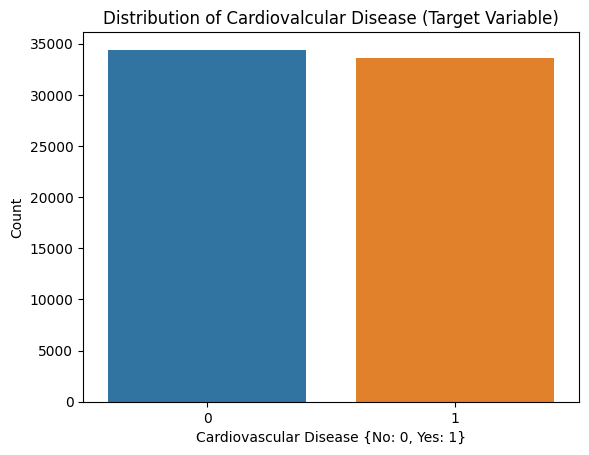

In [13]:
sns.countplot(x = 'cardio', data = df, palette = 'tab10')
plt.title("Distribution of Cardiovalcular Disease (Target Variable)")
plt.xlabel("Cardiovascular Disease {No: 0, Yes: 1}")
plt.ylabel("Count")
plt.show()

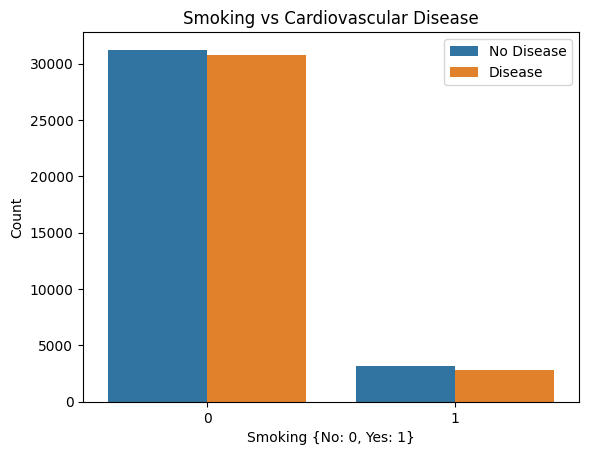

In [14]:
sns.countplot(x = 'smoke', hue = 'cardio', data = df)
plt.title("Smoking vs Cardiovascular Disease")
plt.xlabel("Smoking {No: 0, Yes: 1}")
plt.ylabel("Count")
plt.legend(['No Disease', 'Disease'])
plt.show()

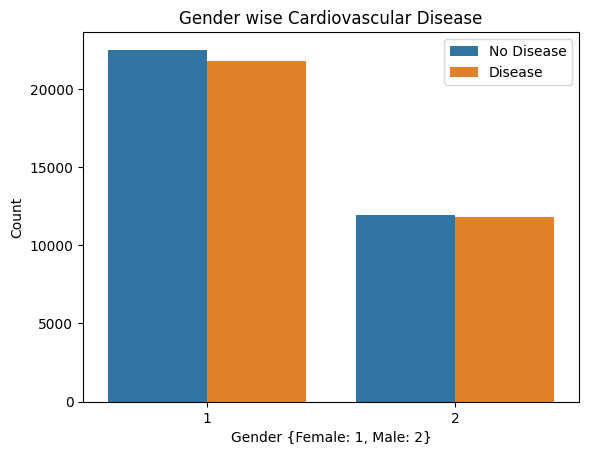

In [15]:
sns.countplot(x = 'gender', hue = 'cardio', data = df)
plt.title("Gender wise Cardiovascular Disease")
plt.xlabel("Gender {Female: 1, Male: 2}")
plt.ylabel("Count")
plt.legend(['No Disease', 'Disease'])
plt.show()

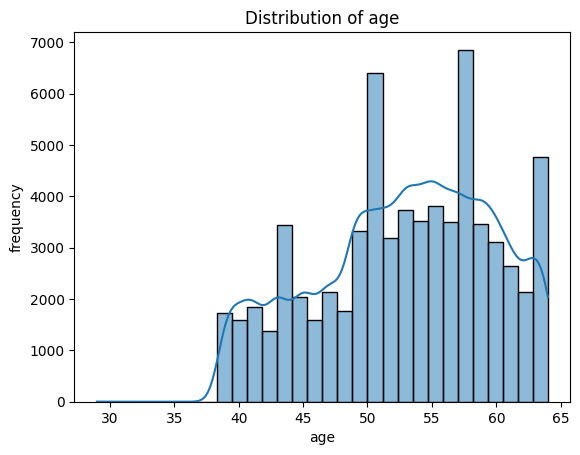

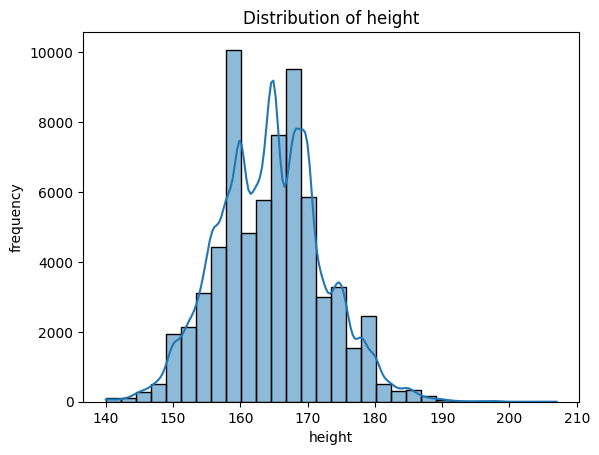

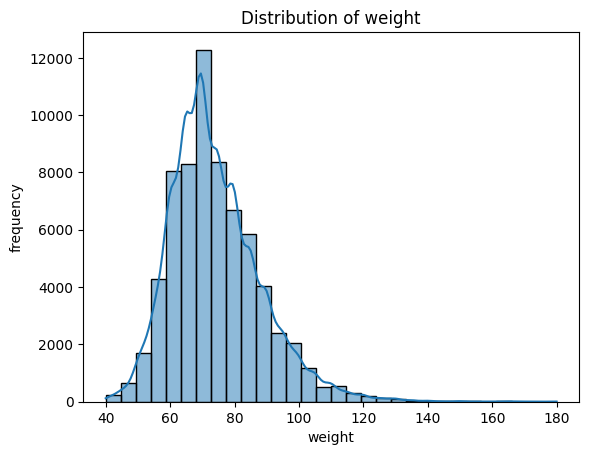

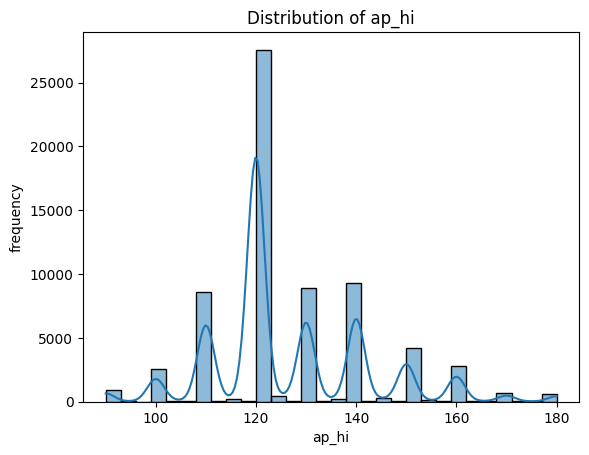

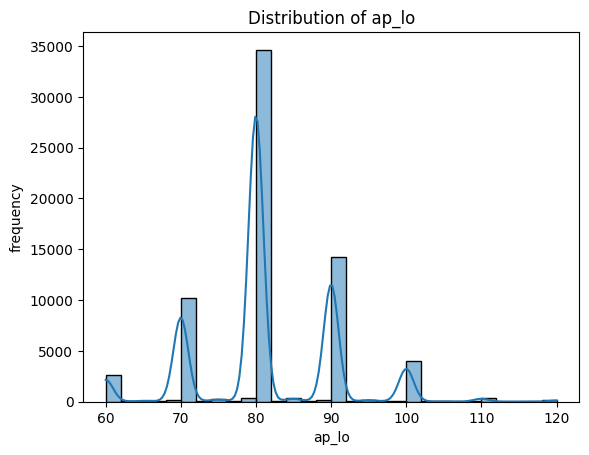

In [16]:
key_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
for features in key_features:
    sns.histplot(df[features], bins=30, kde=True)
    plt.title(f"Distribution of {features}")
    plt.xlabel(f"{features}")
    plt.ylabel("frequency")
    plt.show()

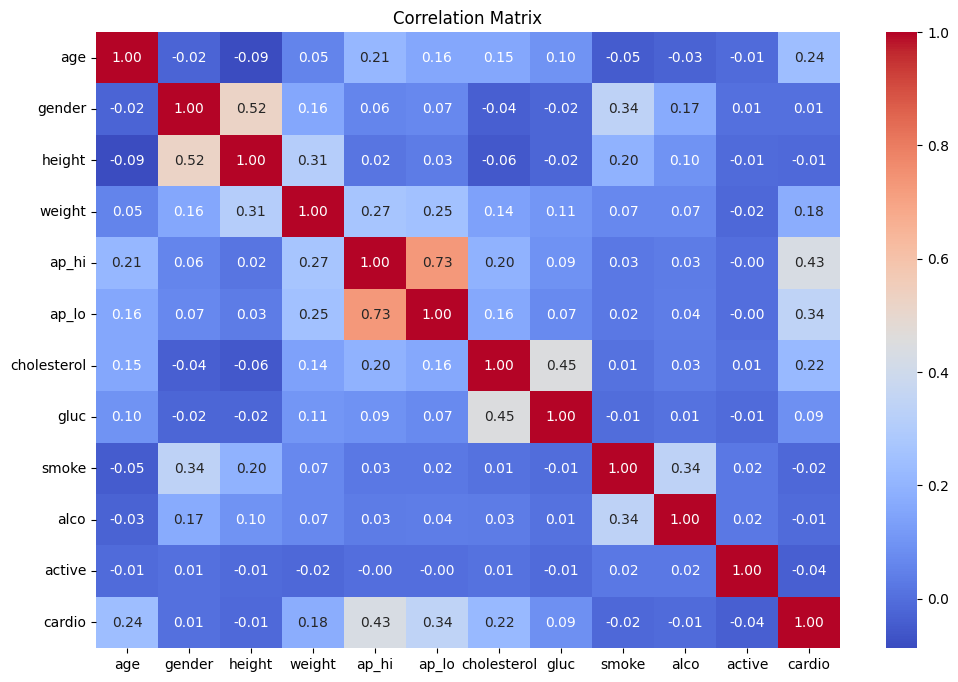

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot = True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### Model Training

We train multiple machine learning models to classify patients as either having or not having cardiovascular disease:
- Logistic Regression
- Random Forest
- XGBoost

Each model is trained on the training data after preprocessing.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop('cardio', axis = 1)
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Logistic Regression

Logistic Regression is a linear, interpretable model and acts as a good baseline.

- It performed well on accuracy and recall, suggesting it's good at identifying patients with disease.
- However, it may underperform in capturing non-linear relationships compared to ensemble methods.
- The ROC and Precision-Recall curves show its moderate ability to separate classes.

Despite its simplicity, Logistic Regression remains useful for quick and interpretable predictions.

Classification Report for Logistic Regression

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      6842
           1       0.74      0.66      0.70      6756

    accuracy                           0.72     13598
   macro avg       0.72      0.72      0.72     13598
weighted avg       0.72      0.72      0.72     13598

Confusion Matrix for Logistic Regression


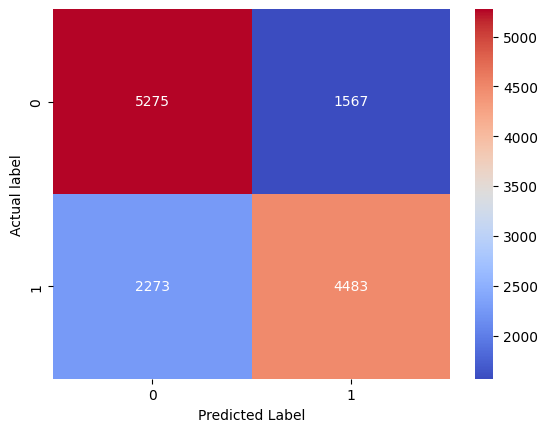

In [19]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

print("Classification Report for Logistic Regression\n")
report = classification_report(y_test, y_pred)
print(report)

print("Confusion Matrix for Logistic Regression")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt = 'd', cmap='coolwarm')
plt.xlabel('Predicted Label')
plt.ylabel('Actual label')
plt.show()

### Random Forest

Random Forest is an ensemble method that uses multiple decision trees to improve generalization.

- It showed strong performance across precision, recall, and F1-score.
- It effectively captured feature interactions and non-linear patterns.
- Feature importance values indicate which clinical metrics contributed most.

Its robustness and accuracy make it a strong candidate for healthcare tasks.

Classification Report for Random Forest

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      6842
           1       0.70      0.69      0.70      6756

    accuracy                           0.70     13598
   macro avg       0.70      0.70      0.70     13598
weighted avg       0.70      0.70      0.70     13598

Confusion Matrix for Random Forest


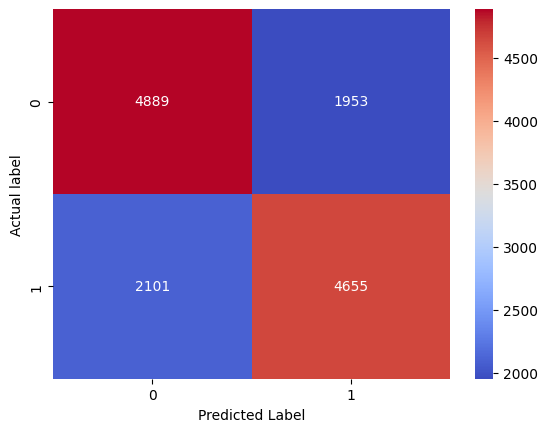

In [20]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

print("Classification Report for Random Forest\n")
report = classification_report(y_test, y_pred)
print(report)

print("Confusion Matrix for Random Forest")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt = 'd', cmap='coolwarm')
plt.xlabel('Predicted Label')
plt.ylabel('Actual label')
plt.show()

### XGBoost

XGBoost is a gradient boosting framework known for high performance on structured data.

- It outperformed other models slightly in ROC-AUC and PR-AUC.
- The model was especially strong at reducing false negatives — a critical factor in healthcare.
- Feature importance confirms similar patterns to Random Forest but with better control over overfitting.

Overall, XGBoost offered the best balance of precision and recall, making it ideal for real-world deployment.

Classification Report for XGBoost

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6842
           1       0.75      0.68      0.72      6756

    accuracy                           0.73     13598
   macro avg       0.73      0.73      0.73     13598
weighted avg       0.73      0.73      0.73     13598

Confusion Matrix for XGBoost


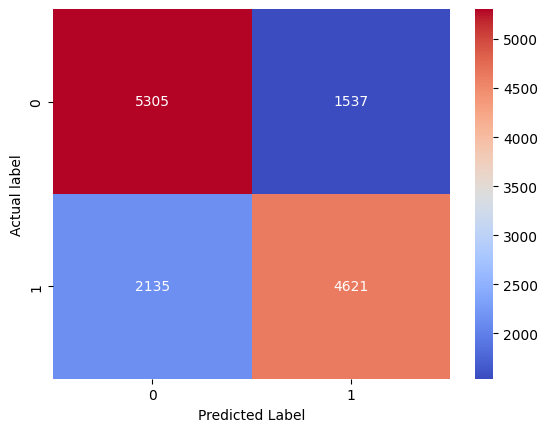

In [21]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)

print("Classification Report for XGBoost\n")
report = classification_report(y_test, y_pred)
print(report)

print("Confusion Matrix for XGBoost")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt = 'd', cmap='coolwarm')
plt.xlabel('Predicted Label')
plt.ylabel('Actual label')
plt.show()

### Final Model Comparison and Insights

This section includes a side-by-side visual comparison of models based on ROC-AUC and Precision-Recall curves. We summarize which model performed best and what features were most influential.

In [22]:
y_proba_logistic = model_lr.predict_proba(X_test)[:, 1]
y_proba_rf = model_rf.predict_proba(X_test)[:, 1]
y_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]

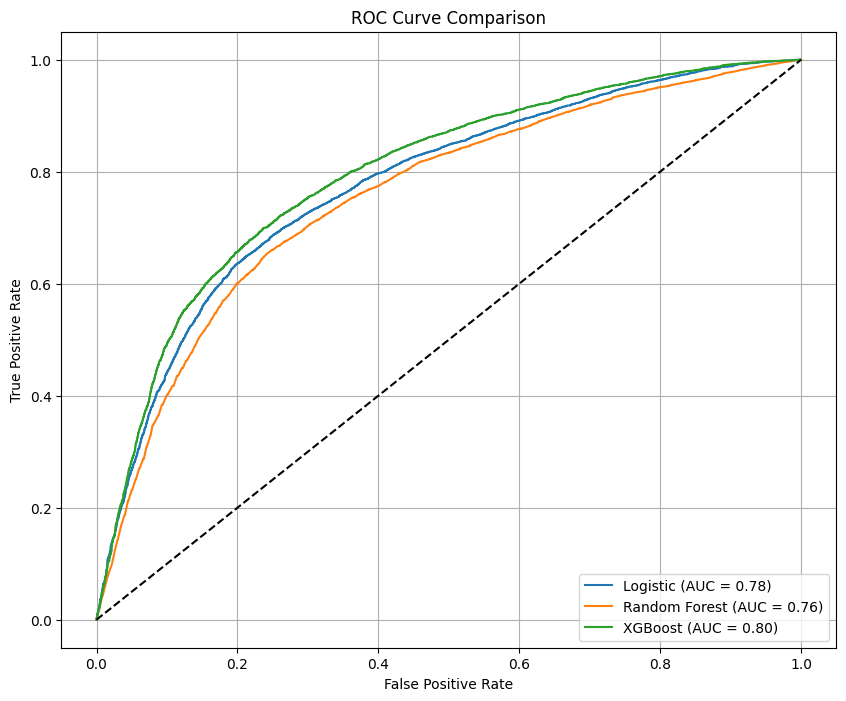

In [23]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

# Logistic Regression
fpr1, tpr1, _ = roc_curve(y_test, y_proba_logistic)
plt.plot(fpr1, tpr1, label=f"Logistic (AUC = {auc(fpr1, tpr1):.2f})")

# Random Forest
fpr3, tpr3, _ = roc_curve(y_test, y_proba_rf)
plt.plot(fpr3, tpr3, label=f"Random Forest (AUC = {auc(fpr3, tpr3):.2f})")

# XGB
fpr4, tpr4, _ = roc_curve(y_test, y_proba_xgb)
plt.plot(fpr4, tpr4, label=f"XGBoost (AUC = {auc(fpr4, tpr4):.2f})")

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid()
plt.show()

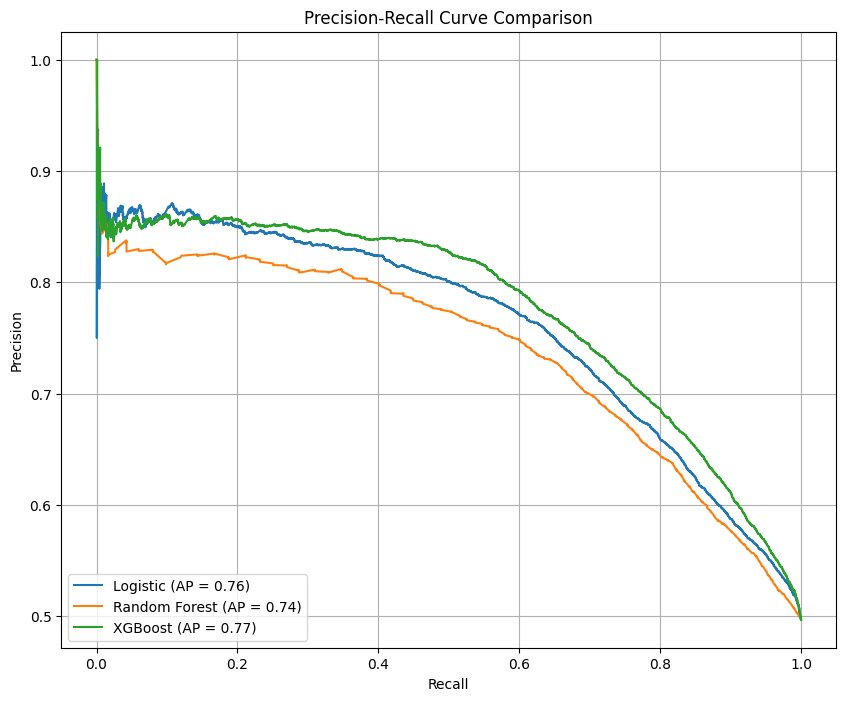

In [24]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 8))

# Logistic Regression
prec1, rec1, _ = precision_recall_curve(y_test, y_proba_logistic)
ap1 = average_precision_score(y_test, y_proba_logistic)
plt.plot(rec1, prec1, label=f"Logistic (AP = {ap1:.2f})")

# Random Forest
prec3, rec3, _ = precision_recall_curve(y_test, y_proba_rf)
ap3 = average_precision_score(y_test, y_proba_rf)
plt.plot(rec3, prec3, label=f"Random Forest (AP = {ap3:.2f})")

# XGBoost
prec4, rec4, _ = precision_recall_curve(y_test, y_proba_xgb)
ap4 = average_precision_score(y_test, y_proba_xgb)
plt.plot(rec4, prec4, label=f"XGBoost (AP = {ap4:.2f})")

# Plot formatting
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend(loc="lower left")
plt.grid()
plt.show()

## Final Conclusion

In this project, I tackled the problem of predicting cardiovascular disease using clinical and biometric data. The dataset contained a balanced representation of positive and negative cases, allowing for fair training and evaluation of models. The goal was to identify individuals at risk of cardiovascular disease to support early intervention and improved patient outcomes.

I trained and evaluated three machine learning models:

- Logistic Regression  
- Random Forest  
- XGBoost  

###  Key Findings:

- **Logistic Regression** offered a strong baseline with good precision and interpretability, making it suitable for clinical deployment where explainability is important.
- **Random Forest** showed higher recall and overall F1-score, successfully capturing more positive cases and revealing key features like age, blood pressure, and cholesterol levels.
- **XGBoost** achieved the highest ROC-AUC and PR-AUC scores, indicating its superior ability to distinguish between patients with and without cardiovascular disease.

### Visualizations and Analysis:

- Conducted EDA to explore age distribution, cholesterol levels, and lifestyle factors like alcohol consumption and physical activity.
- Used correlation heatmaps and class-wise visualizations to understand feature relationships.
- Evaluated models using confusion matrices, classification reports, ROC and Precision-Recall curves.

### Final Recommendation:

For real-world use where identifying high-risk patients is critical, **XGBoost** offers the best balance of precision and recall, with strong generalization and feature importance insights. However, **Logistic Regression** remains a viable option when model interpretability is a top priority.

This project demonstrates how machine learning can support cardiovascular risk prediction, offering scalable tools for preventative care, risk triage, and improved health outcomes in clinical settings.